In [1]:
# 使用pandas读取数据
import pandas as pd


data_path = "./data/adult.data"
raw_data = pd.read_csv(data_path)
## 选取需要使用的列
cols = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week", "label"]
data = raw_data[cols]

In [2]:
## 观察数据
data.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,label
0,39,13,2174,0,40,<=50K
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K


In [6]:
# 将label转换为可以运算的变量
data.loc[:, "label_code"] = pd.Categorical(data.label).codes
data.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,label,label_code
0,39,13,2174,0,40,<=50K,0
1,50,13,0,0,13,<=50K,0
2,38,9,0,0,40,<=50K,0
3,53,7,0,0,40,<=50K,0
4,28,13,0,0,40,<=50K,0


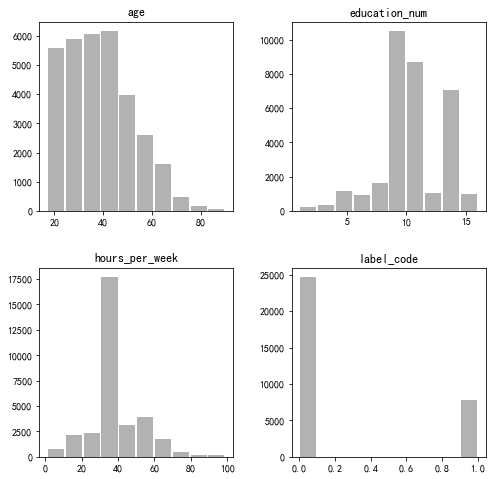

In [7]:
# 画直方图，直观了解数据
import matplotlib.pyplot as plt


plt_data = data[["age", "hours_per_week", "education_num", "label_code"]]
plt_data.hist(rwidth=0.9, grid=False, figsize=(8, 8), alpha=0.6, color="grey")
plt.show()

In [8]:
## 通过统计方法，了解数据性质
### 数据的基本统计信息
data.describe(include="all")

,age,education_num,capital_gain,capital_loss,hours_per_week,label,label_code
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561,32561.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,<=50K,NaN
freq,NaN,NaN,NaN,NaN,NaN,24720,NaN
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,NaN,0.000000


In [9]:
### 计算education_num和label的交叉报表
cross1 = pd.crosstab(pd.qcut(data["education_num"],  [0, .25, .5, .75, 1]), data["label"])
cross1

label,<=50K,>50K
education_num,,
"(0.999, 9.0]",12835,1919
"(9.0, 10.0]",5904,1387
"(10.0, 12.0]",1823,626
"(12.0, 16.0]",4158,3909


(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('(0.999, 9.0]', ' >50K'),
               (0.0, 0.0, 0.4464224253288598, 0.12963430830402656)),
              (('(0.999, 9.0]', ' <=50K'),
               (0.0,
                0.13295656744023918,
                0.4464224253288598,
                0.8670434325597608)),
              (('(9.0, 10.0]', ' >50K'),
               (0.451348533703244,
                0.0,
                0.22060904860191918,
                0.18960252730463215)),
              (('(9.0, 10.0]', ' <=50K'),
               (0.451348533703244,
                0.19292478644084476,
                0.22060904860191918,
                0.8070752135591551)),
              (('(10.0, 12.0]', ' >50K'),
               (0.6768836906795475,
                0.0,
                0.07410116033823905,
                0.2547653188161416)),
              (('(10.0, 12.0]', ' <=50K'),
               (0.6768836906795475,
                0.25808757795235426,
                0.07410116

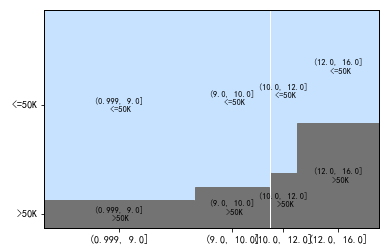

In [10]:
### 将交叉报表可视化
from statsmodels.graphics.mosaicplot import mosaic


props = lambda key: {"color": "0.45"} if ' >50K' in key else {"color": "#C6E2FF"}
mosaic(cross1[[" >50K", " <=50K"]].stack(), properties=props)

In [11]:
### 计算hours_per_week, label交叉报表
cross2 = pd.crosstab(pd.cut(data["hours_per_week"], 5), data["label"])
### 将交叉报表归一化，利于分析数据
cross2_norm = cross2.div(cross2.sum(1).astype(float), axis=0)
cross2_norm

label,<=50K,>50K
hours_per_week,,
"(0.902, 20.6]",0.933402,0.066598
"(20.6, 40.2]",0.810991,0.189009
"(40.2, 59.8]",0.599200,0.400800
"(59.8, 79.4]",0.584670,0.415330
"(79.4, 99.0]",0.648094,0.351906


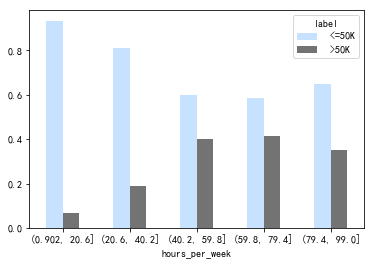

In [12]:
### 图形化归一化后的交叉报表
cross2_norm.plot(kind="bar", color=["#C6E2FF", "0.45"], rot=0)
plt.show()

In [13]:
# 将数据分为训练集和测试集
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(data, test_size=0.2, random_state=2310)

In [14]:
# 搭建逻辑回归模型，并训练模型
import statsmodels.api as sm


## 可以方便地定义新的变量，比如 age * education_num
formula = "label_code ~ age + education_num + capital_gain + capital_loss + hours_per_week"
model = sm.Logit.from_formula(formula, data=train_set)
re = model.fit()

Optimization terminated successfully.
         Current function value: 0.406094
         Iterations 8


In [15]:
## 分析逻辑回归模型的统计性质
### 用f test检验education_num的系数是否显著
print("检验假设education_num的系数等于0：")
print(re.f_test("education_num=0"))
### 用f test检验两个假设是否同时成立
print("检验假设education_num的系数等于0.32和hours_per_week的系数等于0.04同时成立：")
print(re.f_test("education_num=0.32, hours_per_week=0.04"))

检验假设education_num的系数等于0：
<F test: F=array([[1783.4276255]]), p=0.0, df_denom=26042, df_num=1>
检验假设education_num的系数等于0.32和hours_per_week的系数等于0.04同时成立：
<F test: F=array([[0.01940236]]), p=0.9807846677772952, df_denom=26042, df_num=2>


In [16]:
### 整体统计分析结果
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             label_code   No. Observations:                26048
Model:                          Logit   Df Residuals:                    26042
Method:                           MLE   Df Model:                            5
Date:                Sun, 24 Feb 2019   Pseudo R-squ.:                  0.2639
Time:                        22:14:24   Log-Likelihood:                -10578.
converged:                       True   LL-Null:                       -14370.
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -8.2970      0.128    -64.623      0.000      -8.549      -8.045
age                0.0435      0.001     31.726      0.000       0.041       0.046
education_num      0.3215      0.008     42.231      0.000       0.307       0.336
capital_gain       0.0003   1.07e-05     29.650      0.000       0.000       0.000
capital_loss       0.0007   3.64e-05     20.055      0.000       0.001       0.001
hours_per_week     0.0399      0.001     26.995      0.000       0.037       0.043
==================================================================================
"""

In [17]:
# 使用训练好的模型对测试数据做预测
## 计算事件发生的概率 
test_set["prob"] = re.predict(test_set)
print("事件发生概率（预测概率）大于0.6的数据个数：")
print(test_set.loc[test_set["prob"] > 0.6].shape[0])  # 输出值为576

事件发生概率（预测概率）大于0.6的数据个数：
576


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
## 根据预测的概率，得出最终的预测
alpha = 0.5
test_set.loc[:, "pred"] = test_set.apply(lambda x: 1 if x["prob"] > alpha else 0, axis=1)
test_set.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,label,label_code,prob,pred
19463,55,9,0,0,40,<=50K,0,0.195240,0
24430,38,10,0,0,40,<=50K,0,0.137815,0
19621,36,11,0,0,60,<=50K,0,0.309976,0
3862,41,11,0,1848,48,>50K,1,0.571343,1
27549,20,10,0,0,40,<=50K,0,0.068134,0


In [20]:
# 理解模型结果
conf = re.conf_int()
conf["OR"] = re.params
conf

,0,1,OR
Intercept,-8.548604,-8.045324,-8.296964
age,0.040769,0.046138,0.043453
education_num,0.306547,0.336386,0.321467
capital_gain,0.000298,0.000340,0.000319
capital_loss,0.000659,0.000802,0.000730
hours_per_week,0.037038,0.042838,0.039938


In [21]:
## 计算各个变量对事件发生比的影响
## conf里面的三列，分别对应着估计值的下界、上界和估计值本身
import numpy as np


conf.columns = ["2.5%", "97.5%", "OR"]
print("各个变量对事件发生比的影响：")
np.exp(conf)

各个变量对事件发生比的影响：


,2.5%,97.5%,OR
Intercept,0.000194,0.000321,0.000249
age,1.041611,1.047218,1.044411
education_num,1.358725,1.399879,1.379149
capital_gain,1.000298,1.000340,1.000319
capital_loss,1.000659,1.000802,1.000731
hours_per_week,1.037733,1.043769,1.040746


In [24]:
## 计算各个变量的边际效应
print("各个变量的边际效应：")
print(re.get_margeff(at="overall").summary())
# print(re.get_margeff.__doc__)

各个变量的边际效应：
        Logit Marginal Effects       
Dep. Variable:             label_code
Method:                          dydx
At:                           overall
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0056      0.000     33.563      0.000       0.005       0.006
education_num      0.0413      0.001     47.313      0.000       0.040       0.043
capital_gain     4.09e-05    1.3e-06     31.500      0.000    3.84e-05    4.34e-05
capital_loss    9.372e-05   4.54e-06     20.648      0.000    8.48e-05       0.000
hours_per_week     0.0051      0.000     28.167      0.000       0.005       0.005
